# Part 1 Polynomial regression

In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('zuucrew.csv')
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1


In [32]:
df = df[df['CourseName']=='Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [33]:
X = df['TotalHours'].values
y = df['CapstoneScore'].values

# Normalizing the features and target variable
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

print(X, y)


[-0.46997415  1.49313718  0.74798702 -1.2151243   1.20566808  1.55743948
 -1.1205621   0.04066175 -0.27328477 -0.75366076  0.33947831 -1.26807914
 -0.74987827 -0.19385252  0.00661935 -1.52150584  1.54230953 -1.41181369
 -0.05768294  1.34940263  0.50969027 -0.68179348 -1.11677961  1.55743948
  1.4553123  -1.07895473 -0.63640362 -0.82174554 -0.53049396 -0.78770315
  1.6141768  -1.06760727 -1.7257602   0.6609898   0.73663956  0.88037411
 -1.49124594 -0.61749118 -1.52907082  0.42647553  0.68368473  0.84633171
  0.16548385  0.88037411 -0.06524792  0.03309677 -0.28841472 -1.65767541
  0.42269305 -0.6742285   1.34562014 -0.8973953  -0.34893453  1.42126991
  0.41134558  1.22079804  1.29266531  0.08983409  1.00519621  1.03923861
 -1.72197771 -0.00472811 -0.32245711  1.46665976 -0.6439686   0.02174931
  0.64964233 -0.50779903  1.56500445 -0.77635568 -1.61985053 -0.03498801] [-0.58025407  1.40158225  0.60884773 -0.88788239  0.77449375  2.02275483
 -1.28424966 -0.02415671 -0.65716115 -0.65124522 -

In [34]:
def create_polynomial_features(X, degree):
    X = np.array(X).reshape(-1, 1)        
    X_poly = np.ones((X.shape[0], 1))     
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))
    
    return X_poly

In [35]:

print(create_polynomial_features(X, 2))


[[ 1.00000000e+00 -4.69974147e-01  2.20875699e-01]
 [ 1.00000000e+00  1.49313718e+00  2.22945864e+00]
 [ 1.00000000e+00  7.47987023e-01  5.59484587e-01]
 [ 1.00000000e+00 -1.21512430e+00  1.47652707e+00]
 [ 1.00000000e+00  1.20566808e+00  1.45363553e+00]
 [ 1.00000000e+00  1.55743948e+00  2.42561773e+00]
 [ 1.00000000e+00 -1.12056210e+00  1.25565942e+00]
 [ 1.00000000e+00  4.06617471e-02  1.65337768e-03]
 [ 1.00000000e+00 -2.73284766e-01  7.46845631e-02]
 [ 1.00000000e+00 -7.53660755e-01  5.68004534e-01]
 [ 1.00000000e+00  3.39478308e-01  1.15245521e-01]
 [ 1.00000000e+00 -1.26807914e+00  1.60802470e+00]
 [ 1.00000000e+00 -7.49878267e-01  5.62317415e-01]
 [ 1.00000000e+00 -1.93852515e-01  3.75787977e-02]
 [ 1.00000000e+00  6.61935419e-03  4.38158498e-05]
 [ 1.00000000e+00 -1.52150584e+00  2.31498002e+00]
 [ 1.00000000e+00  1.54230953e+00  2.37871867e+00]
 [ 1.00000000e+00 -1.41181369e+00  1.99321788e+00]
 [ 1.00000000e+00 -5.76829436e-02  3.32732198e-03]
 [ 1.00000000e+00  1.34940263e+

In [36]:
def fit_polynomial(X, y, degree, learning_rate=0.01, iterations=1000):
    X_poly = create_polynomial_features(X, degree)
    X_poly = np.array(X_poly)  # ensure numpy array
    y = np.array(y).reshape(-1, 1)
    
    m, n = X_poly.shape
    beta = np.zeros((n, 1))  
    
    cost_history = []
    
    for i in range(iterations):
        y_pred = np.dot(X_poly, beta)
        error = y_pred - y
        gradients = (1/m) * np.dot(X_poly.T, error)
        beta -= learning_rate * gradients
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)
    
    return beta, cost_history

In [37]:
def predict(X, beta, degree):
    X_poly = create_polynomial_features(X, degree)
    return np.dot(X_poly, beta)

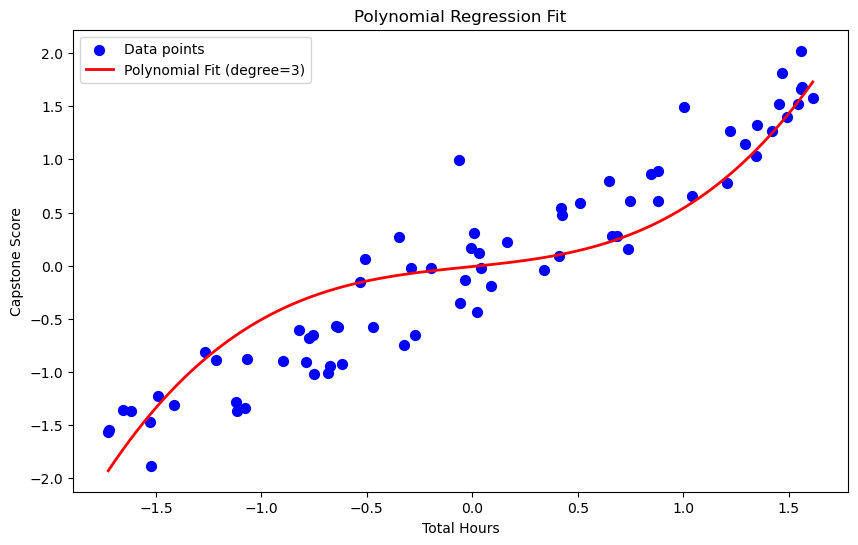

In [38]:
degree = 3
beta, history = fit_polynomial(X, y, degree=degree, learning_rate=0.0001, iterations=5000)

# Plotting the results
X_curve = np.linspace(min(X), max(X), 100)
y_curve = predict(X_curve, beta, degree)


plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', s=50, label="Data points")


plt.plot(X_curve, y_curve, color='red', linewidth=2, label=f"Polynomial Fit (degree={degree})")

plt.title("Polynomial Regression Fit")
plt.xlabel("Total Hours")
plt.ylabel("Capstone Score")
plt.legend()
plt.show()

## Evalution Metrices

In [39]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [40]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [41]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [42]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)  
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2) 
    return 1 - (ss_res / ss_tot)

In [43]:
print("MSE:", mean_squared_error(y, y_curve))
print("MAE:", mean_absolute_error(y, y_curve))
print("RMSE:", root_mean_squared_error(y,y_curve))
print("R²:", r2_score(y, y_curve))

MSE: 1.589902834622512
MAE: 1.02871574057497
RMSE: 1.260913492124861
R²: -157.99028346225117
